In [145]:
import pandas as pd
import numpy as np
temp_data = pd.read_excel("./data.xlsx")
temp_data = temp_data[['title','label']]
#temp_data = temp_data.sort_values(['label'])
#temp_data = temp_data[-2600:]
temp_data

,title,label
0,​서울 휴게음식점 절반 3년 내 폐업,1
1,［데스크칼럼］파업의 악순환 고리 끊어내려면,1
2,★포토성매매 알선·횡령 공판 마친 유인석,1
3,★포토성매매 알섬 혐의·횡령 2차 공판 마친 유인석,1
4,011 쓰게 해달라 소송냈지만SKT 2G사용자 2심도 패소,1
...,...,...
4902,오후 230 현재 코스피는 5644으로 매도우위 매도강세 업종은 의료정밀업1,0
4903,오전시황 코스피 개인 매수세에 상승 전환···조선주 급등,0
4904,오전 1130 현재 코스피는 5644으로 매도우위 매도강세 업종은 의료정밀업,0
4905,오전 1100 현재 코스피는 5743으로 매도우위 매도강세 업종은 의료정밀업,0


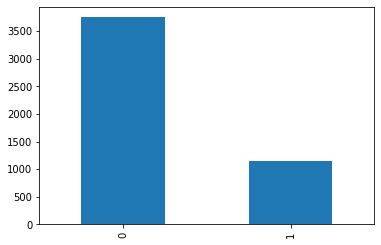

In [146]:
import matplotlib.pyplot as plt

temp_data['label'].value_counts().plot(kind='bar')

In [147]:
stopwords = ['의', '가', '이', '은', '들', '는', '좀', '잘', '걍', '과', '도', '를', '으로', '자', '에', '와', '한', '하다']

#dataset = temp_data[temp_data.index%1==0]
#print(dataset)
import konlpy
from konlpy.tag import Okt
okt = Okt()

X=[]
for sentence in dataset['title']: 
    temp_X = []
    sentence = sentence.strip()
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X.append(temp_X)

Y=[]
for i in dataset['label']:
    if i==0:
        Y.append(0)
    else:
        Y.append(1)

max_len = max([len(s) for s in X])

In [148]:
# dictionary for indexing
word2index={' ':0} 
for sentence in X:
    for word in sentence:
        if word2index.get(word)==None:
            word2index[word]=len(word2index)
print(word2index)

{' ': 0, '\u200b': 1, '서울': 2, '휴게': 3, '음식점': 4, '절반': 5, '3년': 6, '내': 7, '폐업': 8, '［': 9, '데스크': 10, '칼럼': 11, '］': 12, '파업': 13, '악순환': 14, '고리': 15, '끊다': 16, '★': 17, '포토': 18, '성매매': 19, '알선': 20, '·': 21, '횡령': 22, '공판': 23, '마치다': 24, '유인석': 25, '알섬': 26, '혐의': 27, '2': 28, '차': 29, '011': 30, '쓰다': 31, '해달라다': 32, '소송': 33, '내다': 34, 'SKT': 35, 'G': 36, '사용자': 37, '심다': 38, '패소': 39, '017': 40, '민사소송': 41, '항소심': 42, '소비자': 43, '지다': 44, '상대': 45, '0172': 46, '종료': 47, '01': 48, 'X': 49, '못': 50, '놓다': 51, '이용자': 52, '중단': 53, '되다': 54, '번호': 55, '계속': 56, '1000만': 57, '배럴': 58, '감산': 59, '트럼프': 60, '푸틴': 61, '동상': 62, '이몽': 63, '1000억': 64, '원': 65, '물다': 66, '대구시': 67, '신천지': 68, '제기': 69, '1000억원': 70, '”': 71, '손배': 72, '배상하': 73, '라': 74, '신천지교회': 75, '손해배상': 76, '100': 77, 'm': 78, '세계': 79, '챔피언': 80, '’': 81, '콜': 82, '멀다': 83, '도핑': 84, '징계': 85, '로': 86, '도쿄올림픽': 87, '출전': 88, '불투명': 89, '크리스챤': 90, '약물': 91, '검사': 92, '빠지다': 93, '2년': 94, '위기': 95, '100년': 96, '전통'

In [195]:
word2df = pd.DataFrame(columns=['key','value'])
for key,value in word2index.items():
    temp = {'key':key}
    word2df = word2df.append(temp, ignore_index=True)
word2df.to_excel('./word2index.xlsx', index=False)

In [149]:
# word -> vector
X_token = []
for sentence in X:
    temp_word = []    
    for word in sentence:
        temp_word.append(word2index[word])
    X_token.append(temp_word)
print(X_token)

[[1, 2, 3, 4, 5, 6, 7, 8], [9, 10, 11, 12, 13, 14, 15, 16], [17, 18, 19, 20, 21, 22, 23, 24, 25], [17, 18, 19, 26, 27, 21, 22, 28, 29, 23, 24, 25], [30, 31, 32, 33, 34, 35, 28, 36, 37, 28, 38, 39], [30, 21, 40, 37, 41, 42, 39], [30, 21, 40, 31, 32, 33, 34, 43, 28, 38, 44], [30, 21, 40, 31, 32, 35, 45, 33, 28, 38, 44], [30, 21, 46, 36, 47, 33, 34, 43, 28, 38, 35, 44], [48, 49, 50, 51, 28, 36, 52, 35, 45, 28, 38, 39, 33, 53, 54], [48, 49, 55, 56, 31, 32, 35, 33, 28, 38, 39], [57, 58, 59, 60, 21, 61, 62, 63], [64, 65, 66, 67, 68, 45, 41, 69], [70, 66, 71, 67, 68, 45, 72, 33], [70, 73, 74, 67, 75, 76, 33, 69], [77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89], [77, 78, 79, 80, 81, 90, 82, 83, 91, 92, 93, 94, 85, 95], [96, 97, 98, 99, 100, 101, 102, 103, 104, 8, 105], [106, 107, 108, 109, 22, 27, 110, 111, 112, 113], [114, 115, 116, 117, 118, 119, 120, 8, 121], [122, 123, 86, 124, 125, 126, 127, 128, 129, 130, 8, 104], [131, 132, 133, 134, 115, 135, 136, 137, 22, 138, 139, 140], [141, 14

In [150]:
# pad sequence & torch tensor
import torch
for token in X_token:
    if max_len > len(token):
        zero_pad = [0]*(max_len-len(token))
        token.extend(zero_pad)
X = torch.tensor(X_token)
print(X)

tensor([[   1,    2,    3,  ...,    0,    0,    0],
        [   9,   10,   11,  ...,    0,    0,    0],
        [  17,   18,   19,  ...,    0,    0,    0],
        ...,
        [1925, 6753, 4403,  ...,    0,    0,    0],
        [1925, 6754, 4403,  ...,    0,    0,    0],
        [1925, 6756, 4403,  ...,    0,    0,    0]])


In [151]:
Y = torch.tensor(Y)
Y

tensor([1, 1, 1,  ..., 0, 0, 0])

In [152]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X, Y, test_size = 0.2, random_state=1)

from torch.autograd import Variable
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# X_train = torch.from_numpy(X_train).float().to(device)
# Y_train = torch.from_numpy(Y_train).float().to(device)
# print(Y_test)

# X_train = X_train.float().to(device)
# Y_train = Y_train.float().to(device)

# X_test = X_test.float().to(device)
# Y_test = Y_test.float().to(device)

print(X_train.shape)
print(Y_train.shape)

input_batch = Variable(torch.LongTensor(X_train)).cuda()
target_batch = Variable(torch.LongTensor(Y_train)).cuda()

X_test_batch = Variable(torch.LongTensor(X_test)).cuda()
Y_test_batch = Variable(torch.LongTensor(Y_test)).cuda()

torch.Size([3925, 22])
torch.Size([3925])


In [153]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset

dtype = torch.FloatTensor

# Bi-LSTM(Attention) Parameters
vocab_size = len(word2index)
embedding_dim = 2
n_hidden = 5 # number of hidden units in one cell
num_classes = 2  # 0 or 1

class BiLSTM_Attention(nn.Module):
    def __init__(self):
        super(BiLSTM_Attention, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, n_hidden, bidirectional=True)
        self.out = nn.Linear(n_hidden * 2, num_classes)

    # lstm_output : [batch_size, n_step, n_hidden * num_directions(=2)], F matrix
    def attention_net(self, lstm_output, final_state):
        hidden = final_state.view(-1, n_hidden * 2, 1)   # hidden : [batch_size, n_hidden * num_directions(=2), 1(=n_layer)]
        attn_weights = torch.bmm(lstm_output, hidden).squeeze(2) # attn_weights : [batch_size, n_step]
        soft_attn_weights = F.softmax(attn_weights, 1)
        # [batch_size, n_hidden * num_directions(=2), n_step] * [batch_size, n_step, 1] = [batch_size, n_hidden * num_directions(=2), 1]
        context = torch.bmm(lstm_output.transpose(1, 2), soft_attn_weights.unsqueeze(2)).squeeze(2)
        return context, soft_attn_weights.data.cpu().numpy() # context : [batch_size, n_hidden * num_directions(=2)]

    def forward(self, X):
        input = self.embedding(X) # input : [batch_size, len_seq, embedding_dim]
        input = input.permute(1, 0, 2) # input : [len_seq, batch_size, embedding_dim]

        hidden_state = Variable(torch.zeros(1*2, len(X), n_hidden)).cuda() # [num_layers(=1) * num_directions(=2), batch_size, n_hidden]
        cell_state = Variable(torch.zeros(1*2, len(X), n_hidden)).cuda() # [num_layers(=1) * num_directions(=2), batch_size, n_hidden]

        # final_hidden_state, final_cell_state : [num_layers(=1) * num_directions(=2), batch_size, n_hidden]
        output, (final_hidden_state, final_cell_state) = self.lstm(input, (hidden_state, cell_state))
        output = output.permute(1, 0, 2) # output : [batch_size, len_seq, n_hidden]
        attn_output, attention = self.attention_net(output, final_hidden_state)
        return self.out(attn_output), attention # model : [batch_size, num_classes], attention : [batch_size, n_step]

In [162]:
model = BiLSTM_Attention()
model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

epo = []
acc = []
# Training
for epoch in range(800):
    total_loss = 0 
    optimizer.zero_grad()
    output, attention = model(input_batch)
    loss = criterion(output, target_batch)
    if (epoch + 1) % 50 == 0:
        print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.6f}'.format(loss))
        print('Accuracy :',sum(output.data.max(1)[1].cpu().data.numpy()==target_batch.cpu().data.numpy())/len(target_batch.cpu().data.numpy()))
        
        # Predict
        result, _ = model(X_test_batch)
        result = result.data.max(1)[1]
        accuracy = sum(Y_test_batch.cpu().data.numpy() == result.cpu().numpy()) / len(Y_test_batch.cpu().data.numpy())
        print('%04d' % (epoch + 1),'test accuracy :', accuracy)
        epo.append(epoch + 1)
        acc.append(accuracy)
    loss.backward()
    optimizer.step()

Epoch: 0050 cost = 0.760046
Accuracy : 0.23821656050955414
0050 test accuracy : 0.225050916496945
Epoch: 0100 cost = 0.613413
Accuracy : 0.7615286624203822
0100 test accuracy : 0.774949083503055
Epoch: 0150 cost = 0.543444
Accuracy : 0.7617834394904459
0150 test accuracy : 0.774949083503055
Epoch: 0200 cost = 0.538372
Accuracy : 0.7617834394904459
0200 test accuracy : 0.774949083503055
Epoch: 0250 cost = 0.532037
Accuracy : 0.7617834394904459
0250 test accuracy : 0.774949083503055
Epoch: 0300 cost = 0.520742
Accuracy : 0.7617834394904459
0300 test accuracy : 0.774949083503055
Epoch: 0350 cost = 0.485972
Accuracy : 0.7617834394904459
0350 test accuracy : 0.774949083503055
Epoch: 0400 cost = 0.340741
Accuracy : 0.8545222929936306
0400 test accuracy : 0.8167006109979633
Epoch: 0450 cost = 0.244111
Accuracy : 0.9263694267515924
0450 test accuracy : 0.8747454175152749
Epoch: 0500 cost = 0.183557
Accuracy : 0.9526114649681529
0500 test accuracy : 0.8890020366598778
Epoch: 0550 cost = 0.14328

<function matplotlib.pyplot.show(*args, **kw)>

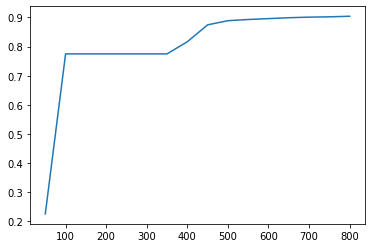

In [163]:
import matplotlib.pyplot as plt
plt.plot(epo,acc)
plt.show

In [164]:
max(acc)
for i,j in enumerate(acc):
    if max(acc) == j:
        print(i)

15


In [165]:
# Predict
result, _ = model(X_test_batch)
result = result.data.max(1)[1]#, keepdim=True)[1]
print(result[:10])
print(Y_test_batch[:10])

tensor([0, 0, 1, 0, 0, 0, 0, 1, 1, 1], device='cuda:0')
tensor([0, 0, 1, 0, 0, 0, 0, 1, 1, 1], device='cuda:0')


In [166]:
result

tensor([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,

In [167]:
Y_test_batch

tensor([0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
        0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
        0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [168]:
accuracy = sum(Y_test_batch.cpu().data.numpy() == result.cpu().numpy()) / len(Y_test_batch.cpu().data.numpy())
accuracy

0.9032586558044806

In [169]:
# save
savePath = "./nlp_model.pth"
torch.save(model.state_dict(), savePath)

6757